### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
vehicle=pd.read_csv("vehicle.csv")
vehicle_df=vehicle.dropna()
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

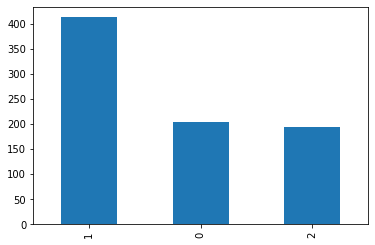

In [2]:
from sklearn import preprocessing as prep
le=prep.LabelEncoder()
vehicle_df['class']=le.fit_transform(vehicle_df['class'])
#vehicle_df.head()

vehicle_df['class'].value_counts().plot(kind='bar')

### Check for any missing values in the data 

In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [4]:
vehicle_df2=vehicle_df.drop('class', axis=1)

In [5]:
from scipy.stats import zscore
vehicle_df_z = vehicle_df2.apply(zscore)

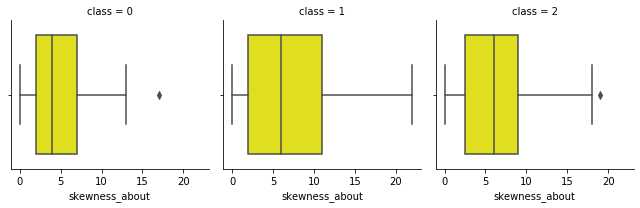

In [6]:
a = sns.FacetGrid(vehicle_df, col='class')
a.map(sns.boxplot, 'skewness_about', color='yellow')

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [7]:
cluster_range = range(1, 10) 
cluster_errors = []
for cluster_num in cluster_range:
    clusters = KMeans( cluster_num)
    model=clusters.fit(vehicle_df_z)#First we need to
    cluster_errors.append( model.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [8]:
cluster_range = range(1, 11) 
cluster_errors = []
for cluster_num in cluster_range:
    clusters = KMeans( cluster_num)
    model=clusters.fit(vehicle_df_z)#First we need to
    cluster_errors.append( model.inertia_ )
clusters_df = pd.DataFrame( { "cluster_num":cluster_range, "cluster_errors": cluster_errors } )
clusters_df    

,cluster_num,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5185.617316
5,6,4707.810964
6,7,4355.019229
7,8,4105.282521
8,9,3848.165203
9,10,3653.013250


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

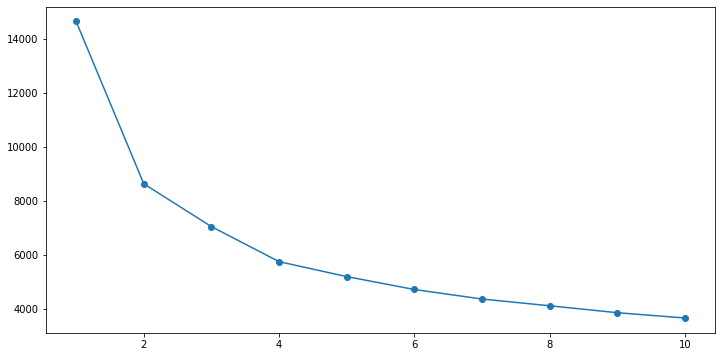

In [9]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.cluster_num, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [10]:
#k=1, highest level of inertia
#k=2,3,4, drop in inertia..and slopes are also almost same
#but gradually it nears to straight line from where optimization begins. 
#The most appropriat evalue of k is 6, all the inertia is nearby related6,7 and 8

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [11]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2)

In [12]:
kmeans.fit(vehicle_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [13]:
centroids=kmeans.cluster_centers_

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [14]:
#visualizing the centroids. cetroid here has 4 values. idetfy which one is setosa
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_df_z) )
centroid_df
#skip weakest feature interpretation (-ves)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
1,-0.916833,-0.526197,-0.887660,-1.087301,-0.563172,-0.301083,-0.780130,0.867496,-0.746977,-0.490093,-0.801399,-0.784100,-0.393622,0.779115,-0.091855,-0.283968,-1.043366,-1.099425
2,-0.225338,-0.574343,-0.307614,-0.038187,0.181774,-0.172461,-0.455562,0.320123,-0.483944,-0.536606,-0.420568,-0.460233,-0.603828,-0.644323,-0.060996,0.004548,0.824842,0.707985
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [15]:
labels = kmeans.labels_

In [16]:
#labels = kmeans.labels_
labels

array([2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 3, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0,
       1, 1, 0, 1, 3, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 3, 1, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 3, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [17]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [18]:
a_df=pd.DataFrame(a,columns = ['X1', 'X2'])
b_df=pd.DataFrame(b,columns = ['X1', 'X2'])
c_df=pd.DataFrame(c,columns = ['X1', 'X2'])

In [19]:
df=pd.concat([a_df,b_df,c_df])
df

,X1,X2
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
...,...,...
95,9.248848,24.346291
96,6.958291,16.448655
97,11.260042,20.333577
98,6.889835,21.238297


### 10. Use scatter matrix to print all the 3 distributions

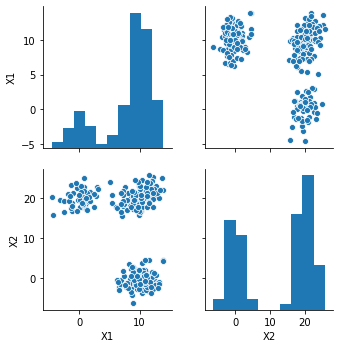

In [20]:
sns.pairplot(df)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [21]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
Z = linkage(df, 'ward',metric='euclidean' )

### 12. Plot the dendrogram for the consolidated dataframe

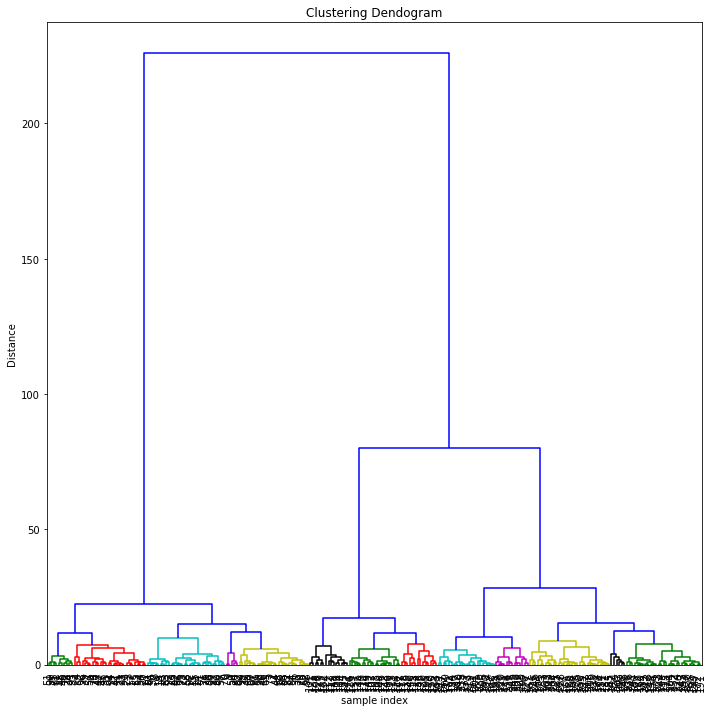

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90,color_threshold =10, leaf_font_size=10 )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

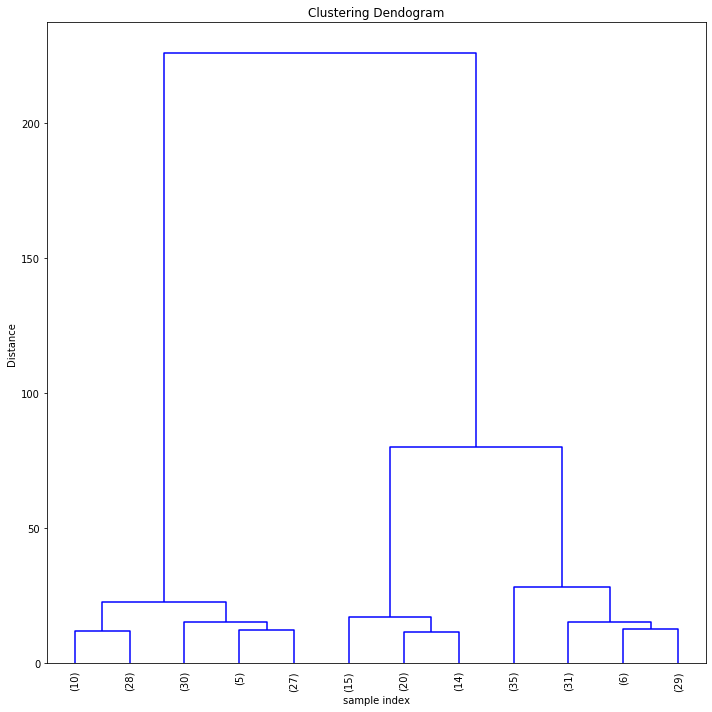

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90,color_threshold =8, leaf_font_size=10,p=12, truncate_mode='lastp' )
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [24]:
#From the above dendogram, very significantly we can see that inputs for all three groups has begun from/after 50.
#50 can be taken as optimal distance between clusters that can be taken as input

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [25]:
from scipy.cluster.hierarchy import fcluster

In [26]:
print("--------\nValues from flcuster:\n{}".format(fcluster(Z, 50, criterion='distance')))

--------
Values from flcuster:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Use matplotlib to visually observe the clusters in 2D space 

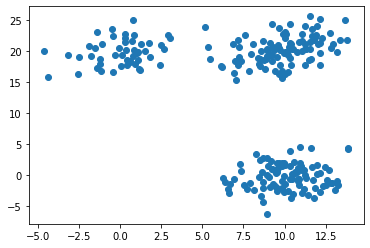

In [27]:
plt.scatter(df['X1'],df['X2'])